In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('merge_customized_regex_V3.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56053 entries, 0 to 56052
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   search                              56053 non-null  object 
 1   Site                                56053 non-null  object 
 2   name                                56053 non-null  object 
 3   Brand                               2092 non-null   object 
 4   Final Price                         46715 non-null  object 
 5   Full Price                          11563 non-null  object 
 6   Quantity                            6706 non-null   object 
 7   image URL                           41940 non-null  object 
 8   country                             56053 non-null  object 
 9   hyperlink                           28145 non-null  object 
 10  quantity_number                     39956 non-null  float64
 11  quantity_type                       21746

In [17]:
df.quantity_number = df.quantity_number.astype(float)

In [18]:
# plt.figure(figsize=(15,15))
# plt.plot(df.isnull().sum().sort_values(), df.isnull().sum().sort_values().index, linewidth=5)
# plt.yticks(fontsize=20)
# plt.xticks(fontsize=20)
# plt.grid(alpha=0.3)

In [19]:
import plotly.offline as py
import plotly.graph_objs as go

def bar_plot(x, y, title, yaxis, c_scale):
    trace = go.Bar(
    x = x,
    y = y,
    marker = dict(color = y, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout, )
    return py.iplot(fig)

In [20]:
bar_plot(df.isnull().sum().sort_values().index, df.isnull().sum().sort_values(), 'Numero de valores nulos por columns', 'valores nulos', 'amp')

In [21]:
import re

def convert_braz_currency_final_price(c, p):
    if c == 'BRASIL (BRA)':
        try:
            p = p.split('Por', 1)[1]
        except:
            pass
        try:
            y = '.'.join(re.findall('[0-9]+', str(p)))
        except:
            y = p
        if y.count('.') >= 2:
            y = y.replace('.', '', 1)
    else:
        try:
            y = '.'.join(re.findall('[0-9]+', str(p).replace(',', '')))
        except:
            y = str(p).replace(',', '')

    if y:
        return float(y)
    else:
        return np.nan

def convert_braz_currency_full_price(c, p):
    if c == 'BRASIL (BRA)':
        try:
            p = p.split('Por', 1)[0]
        except:
            pass
        try:
            y = '.'.join(re.findall('[0-9]+', str(p).replace('.', '')))
        except:
            y = p
    else:
        try:
            y = '.'.join(re.findall('[0-9]+', str(p).replace(',', '')))
        except:
            y = str(p).replace(',', '')
    
    if y:
        return float(y)
    else:
        return np.nan
    
df['Final_price_customized'] = df.apply(
         lambda row: convert_braz_currency_final_price(row['country'], row['Final Price']),
         axis=1)

df['Full_price_customized'] = df.apply(
         lambda row: convert_braz_currency_full_price(row['country'], row['Full Price']),
         axis=1)



In [22]:
df['Final_price_customized'] = df['Final_price_customized'].astype(float)
df['Full_price_customized'] = df['Full_price_customized'].astype(float)

<AxesSubplot:>

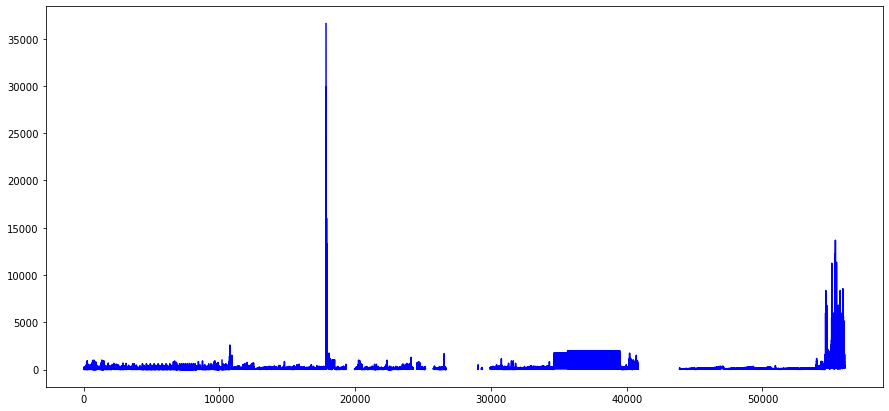

In [23]:
df['Final_price_customized'].plot(figsize=(15, 7), color=['blue', 'red'])

In [24]:
df.to_excel('prices_normalized.xlsx', index=False)